In [93]:
# import Tweaker
import numpy as np
# the stl library is inside of numpy, so import it second
from stl import mesh
import stl
import os
import RunTweakerFromProgram
from RunTweakerFromProgram import Configuration
from RunTweakerFromProgram import RunTweakerFromProgram
import csv
import pandas as pd

from mpl_toolkits import mplot3d
from matplotlib import pyplot


In [44]:
class stlfile:
    originalname = ''
    tweakedname = ''

# Get a list of stl files
path = r"""C:\Users\singers\Documents\buildplateoptimization\Group1"""
listOfSTLfiles = []
for root, dirs, files in os.walk(path):
        for file_ in files:
            filename, file_extension = os.path.splitext(file_)
            if(file_extension=='.stl'):
                completepath = os.path.join(root, file_)
                print(completepath)
                listOfSTLfiles.append(completepath)




C:\Users\singers\Documents\buildplateoptimization\3DBenchy2.stl
C:\Users\singers\Documents\buildplateoptimization\all.stl
C:\Users\singers\Documents\buildplateoptimization\death_star.stl
C:\Users\singers\Documents\buildplateoptimization\death_star_out.stl
C:\Users\singers\Documents\buildplateoptimization\demo_object.stl
C:\Users\singers\Documents\buildplateoptimization\mobius_strip.stl
C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl
C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl
C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl
C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl
C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl


In [45]:
 # Test to see if they are valid by trying to process them with the numpystl library
numfiles = len(listOfSTLfiles)
volumeArray =np.empty( shape=(numfiles,1) )
count = 0
validSTLfiles = []
    
for filepath in listOfSTLfiles:
    print(filepath)
    volume=0
    
    try:
        your_mesh = mesh.Mesh.from_file(filepath)
        volume, cog, inertia = your_mesh.get_mass_properties()
        validSTLfiles.append(filepath)
    except:
        print('error occured')
    finally:
        if(np.isnan(volume)):

            volume =0
            np.insert(volumeArray,count,volume)
            count+=1
            
# Write to CSV    
# print('Write the list to a file')

# d = {'stlfiles':validSTLfiles}
# df = pd.DataFrame(data=d)
# df.to_csv('stlfiles.csv')

# print('reading the csv file')
# df = pd.read_csv('stlfiles.csv')
# validSTLfiles  = df['stlfiles'].values.tolist()

# print(listOfSTLfiles)
# with open('validSTLfiles.csv', 'wb') as myfile:
#     writer = csv.writer(myfile)
#     writer.writerows(listOfSTLfiles)
    # for rowtext in listOfSTLfiles:
    #     print(rowtext)
    #     wr.writerow(rowtext)

        

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


C:\Users\singers\Documents\buildplateoptimization\3DBenchy2.stl


Unable to read the file with speedups, retrying
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


C:\Users\singers\Documents\buildplateoptimization\all.stl
error occured
C:\Users\singers\Documents\buildplateoptimization\death_star.stl
C:\Users\singers\Documents\buildplateoptimization\death_star_out.stl
C:\Users\singers\Documents\buildplateoptimization\demo_object.stl
C:\Users\singers\Documents\buildplateoptimization\mobius_strip.stl
C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl


Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69
Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl
C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl
C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl
C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl


In [46]:
# Loop over the files and run in tweaker
print('Rename Files')
Tweaked =[]
for currentFile in validSTLfiles:
    config = Configuration()
    config.inputfile = currentFile
    print(currentFile)
    folder, filename = os.path.split(str(currentFile))
    first = filename[0:4]
    print(filename)
    if first != 'new_':
        newfilename = 'new_'+filename
        print(newfilename)
        newFullPath = os.path.join(folder,newfilename)
        print(newFullPath)
        config.outputfile  = newFullPath

        RunTweakerFromProgram(config)
        print(config.outputfile)
        Tweaked.append(newFullPath)


Rename Files
C:\Users\singers\Documents\buildplateoptimization\3DBenchy2.stl
3DBenchy2.stl
new_3DBenchy2.stl
C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl
C:\Users\singers\Documents\buildplateoptimization\3DBenchy2.stl
b'\xaaq\x03\x00'
(225706,)
Calculating the optimal orientation:
  3DBenchy2.stl
Progress is: 18 %
Progress is: 36 %
Progress is: 54 %
Examine 8 orientations:
  Alignment:                 Bottom:   Overhang: Contour:  Unpr.:     
Progress is: 72 %
  [0. 0. 1.]                 9.827     247.853   12.539    17.03      
  [-0.0957 -0.0814 -0.9921]  301.68    353.345   69.476    4.58       
  [-0.      0.0872  0.9962]  272.335   120.419   66.01     1.6        
  [-0.9984  0.0555 -0.0049]  23.748    262.181   19.493    10.25      
  [ 0.9954 -0.0485  0.083 ]  0         294.016   0.0       297.96     
  [-0.0957 -0.0815 -0.9921]  301.68    353.344   69.476    4.58       
  [-0.0957 -0.0813 -0.9921]  301.68    353.344   69.476    4.58       
  [-0.2867 -0.0

C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl
C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl
new_3DBenchy2.stl
C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl
new_death_star.stl
C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl
new_death_star_out.stl
C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl
new_demo_object.stl
C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl
new_mobius_strip.stl


In [132]:

def find_mins_maxs(obj):
    minx = maxx = miny = maxy = minz = maxz = None
    for p in obj.points:
    # p contains (x, y, z)
        if minx is None:
            minx = p[stl.Dimension.X]
            maxx = p[stl.Dimension.X]
            miny = p[stl.Dimension.Y]
            maxy = p[stl.Dimension.Y]
            minz = p[stl.Dimension.Z]
            maxz = p[stl.Dimension.Z]
        else:
            maxx = max(p[stl.Dimension.X], maxx)
            minx = min(p[stl.Dimension.X], minx)
            maxy = max(p[stl.Dimension.Y], maxy)
            miny = min(p[stl.Dimension.Y], miny)
            maxz = max(p[stl.Dimension.Z], maxz)
            minz = min(p[stl.Dimension.Z], minz)
    print(str(minx), str(maxx), str(miny), str(maxy), str(minz), str(maxz))
    
    return minx, maxx, miny, maxy, minz, maxz



In [133]:
def copy_obj(obj, dims, num_rows, num_cols, num_layers):
    w, l, h = dims
    copies = []
    for layer in range(num_layers):
        for row in range(num_rows):
            for col in range(num_cols):
                # skip the position where original being copied is
                if row == 0 and col == 0 and layer == 0:
                    continue
                _copy = mesh.Mesh(obj.data.copy())
                # pad the space between objects by 10% of the dimension being
                # translated
                if col != 0:
                    translate(_copy, w, w / 10., col, 'x')
                if row != 0:
                    translate(_copy, l, l / 10., row, 'y')
                if layer != 0:
                    translate(_copy, h, h / 10., layer, 'z')
                copies.append(_copy)
    return copies

In [150]:
# Define STL Class and Functions
class STLattributes:

#     filepath = None
#     maxx = None
#     minx = None
#     maxy = None
#     miny = None
#     maxz = None
#     minz = None
#     xdif = None
#     ydif = None
#     zdif = None
        
    def __init__(self, filepath):
        self.filepath = filepath
        self.filename = ''
        self.geo = mesh.Mesh.from_file(self.filepath)
        self.maxx, self.minx, self.maxy, self.miny, self.maxz, self.minz = find_mins_maxs(self.geo)
        self.xdif = abs(self.maxx-self.minx)
        self.ydif = abs(self.maxy-self.miny)
        self.zdif = abs(self.maxz-self.minz)
        
        self.volume = self.xdif*self.ydif*self.zdif
    def __repr__(self):
        return self.filepath
    
    def translate(self, step, padding, multiplier, axis):
        while multiplier == 0:
            print("A multiplier of 0 will result in no translation.")
            multiplier = input("Enter a modifier: ")
        if axis == 'x':
            items = [0, 3, 6]
        elif axis == 'y':
            items = [1, 4, 7]
        elif axis == 'z':
            items = [2, 5, 8]
        newList = list()
        for p in self.geo.points:
            #point items are ((x, y, z), (x, y, z), (x, y, z))
            for i in range(3):
                p[items[i]] += (step * multiplier) + (padding * multiplier)
                
            newList.append(p)
        self.geo.points = newList
                
        print("--"*20)
        print("About to call the find_mins_max function!")
        print(str(self.minx),str(self.maxx),str(self.miny),str(self.maxy),str(self.minz),str(self.maxz))        
        self.minx,self.maxx,self.miny,self.maxy,self.minz,self.maxz = find_mins_maxs(self.geo)
        print("After the find_mins_max function")
        print("--"*20)
    
    def flush(self):
        if self.maxz < 0:
            self.translate(-self.maxz, 0, 1,'z')
            self.minx, self.maxx, self.miny, self.maxy, self.minz, self.maxz = find_mins_maxs(self.geo)
        elif self.minz < 0:
            self.translate(-self.minz, 0, 1,'z')
            self.maxx, self.minx, self.maxy, self.miny, self.maxz, self.minz = find_mins_maxs(self.geo)
        
            

In [151]:
# Define Files as STL class and pull geometry & data
AllFiles = []
for thing in Tweaked:
    model = STLattributes(thing)
    AllFiles.append(model)
print(AllFiles)

-30.212017 30.212017 -17.01547 14.068529 0.5479547 48.548
-19.967815 19.911695 -19.999619 19.860607 -19.851385 19.995205
-19.967815 19.911695 -19.999619 19.860607 -19.851385 19.995205
-1.5 45.5 44.31961 103.07095 -86.11038 -9.666366
-99.45254 120.536316 -98.17539 76.48669 -95.640724 136.81485
[C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl, C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl, C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl, C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl, C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl]


In [152]:
# Define Build Plate Space
# width = input('What is the width of the buildplate? ')
# length = input('What is the length of the buildplate? ')
# height = input('What is the height of the buildplate? ')

width = 150
length = 250
height = 300
volume = width*length*height

In [153]:
# Check if any files are too big
FitFiles = []
for thing in AllFiles:
    if thing.volume > volume:
        print("Warning: " + str(thing.filepath) + "is too big for the buildplate"),
        answer = input('Do you wish to continue? (Y/N) ')
        if answer == 'Y':
            choice = input('Would you like to resize (R) or exclude the model (E)? ')
            if choice[0] == 'R' or 'r':
                print('Work on this resizing thing later!!!')
            elif choice[0] == 'E' or 'e':
                print('')
        elif answer == 'N':
            print('')
    else:
        FitFiles.append(thing)
        
print(FitFiles)

[C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl, C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl, C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl, C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl, C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl]


In [154]:
# Sort files
FitFiles.sort(key = lambda file: file.zdif)
print(''),
print(FitFiles)


[C:\Users\singers\Documents\buildplateoptimization\new_death_star.stl, C:\Users\singers\Documents\buildplateoptimization\new_death_star_out.stl, C:\Users\singers\Documents\buildplateoptimization\new_3DBenchy2.stl, C:\Users\singers\Documents\buildplateoptimization\new_demo_object.stl, C:\Users\singers\Documents\buildplateoptimization\new_mobius_strip.stl]


In [155]:
# Make all objects flush

for thing in FitFiles:
    thing.flush()

----------------------------------------
About to call the find_mins_max function!
19.911695 -19.967815 19.860607 -19.999619 19.995205 -19.851385
-19.967815 19.911695 -19.999619 19.860607 0.0 39.84659
After the find_mins_max function
----------------------------------------
-19.967815 19.911695 -19.999619 19.860607 0.0 39.84659
----------------------------------------
About to call the find_mins_max function!
19.911695 -19.967815 19.860607 -19.999619 19.995205 -19.851385
-19.967815 19.911695 -19.999619 19.860607 0.0 39.84659
After the find_mins_max function
----------------------------------------
-19.967815 19.911695 -19.999619 19.860607 0.0 39.84659
----------------------------------------
About to call the find_mins_max function!
45.5 -1.5 103.07095 44.31961 -9.666366 -86.11038
-1.5 45.5 44.31961 103.07095 0.0 76.444016
After the find_mins_max function
----------------------------------------
-1.5 45.5 44.31961 103.07095 0.0 76.444016
----------------------------------------
About t

In [160]:
# Order them on plate
origin = [0,0]
row = []
combined = None
for thing in FitFiles:
    sum += thing.xdif
    
    if sum >= width:
        max_y_in_row = max([x for x in row])
        origin[0] = 0
        origin[1] += max_y_in_row
        print(origin[1])
    row.append(thing.ydif)
    thing.translate(origin[0]-thing.minx+2,0,1,'x')
    thing.translate(origin[1]-thing.miny+2,0,1,'y')
    origin[0] = thing.maxx

# Concatenate and Save   

combined = mesh.Mesh(np.concatenate([x.geo.data for x in FitFiles]))
combined.save('new_combined.stl', mode=stl.Mode.ASCII)


----------------------------------------
About to call the find_mins_max function!
41.87951 81.75902 2.0 41.860226 0.0 39.84659
2.0 41.87951 2.0 41.860226 0.0 39.84659
After the find_mins_max function
----------------------------------------
----------------------------------------
About to call the find_mins_max function!
2.0 41.87951 2.0 41.860226 0.0 39.84659
2.0 41.87951 2.0 41.860226 0.0 39.84659
After the find_mins_max function
----------------------------------------
----------------------------------------
About to call the find_mins_max function!
81.75902 121.63853 2.0 41.860226 0.0 39.84659
43.87951 83.75902 2.0 41.860226 0.0 39.84659
After the find_mins_max function
----------------------------------------
----------------------------------------
About to call the find_mins_max function!
43.87951 83.75902 2.0 41.860226 0.0 39.84659
43.87951 83.75902 2.0 41.860226 0.0 39.84659
After the find_mins_max function
----------------------------------------
--------------------------

In [161]:
values = [100, -1000]
print(max(values))

100


In [162]:
CombinedPath = path+'\\new_combined.stl'
print(CombinedPath)


C:\Users\singers\Documents\buildplateoptimization\new_combined.stl


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # This is added back by InteractiveShellApp.init_path()


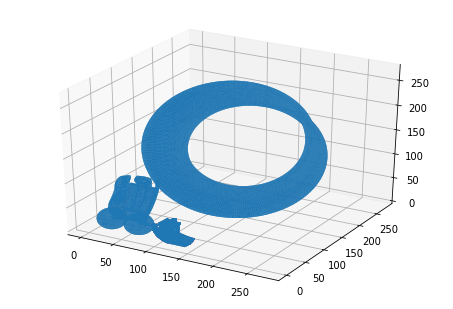

In [163]:
# Graph
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(CombinedPath)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()